# Summary of Topics and Plot Usage in the Notebook

## Topics Covered

1. **Data Loading and Exploration**
    - Loaded Titanic dataset using seaborn.
    - Displayed column names, first few rows, dataset info, summary statistics, and checked for missing values.
    - Explored unique values in categorical columns and filled missing values.

2. **Data Cleaning**
    - Filled missing values in columns such as 'deck', 'age', and 'embark_town' using appropriate strategies (mean, mode, or constant).

3. **Data Visualization**
    - Utilized various plot types to analyze and visualize different aspects of the Titanic dataset.

4. **Linear Regression Modeling**
    - Built a linear regression model using `LinearRegression` from scikit-learn to predict passenger fare based on age and pclass.
    - Split the data into training and test sets (`X_train`, `X_test`, `y_train`, `y_test`).
    - Fitted the model and evaluated its performance using R² score.

## Usage of Each Plot

- **Histogram (`titanic['age'].plot(kind='hist')`)**
  - Visualizes the distribution of passenger ages, helping to understand age demographics.

- **Bar Chart (`titanic['survived'].value_counts().plot(kind='bar')`)**
  - Shows the count of survivors vs. non-survivors, providing a quick overview of survival rates.

- **Bar Chart with Labels**
  - Adds value labels to the survival count bars for clearer interpretation.

- **Stacked Bar Chart (`survival_gender.plot(kind='bar', stacked=True)`)**
  - Displays survival counts by gender, allowing comparison of survival rates between males and females.

- **Pie Chart (`titanic['sex'].value_counts().plot(kind='pie')`)**
  - Illustrates the proportion of male vs. female passengers.

- **Scatter Plot (`plt.scatter(titanic['age'], titanic['fare'], c=titanic['survived'])`)**
  - Shows the relationship between age and fare, colored by survival status, revealing patterns in survival across age and fare.

- **Scatter Plot by Class**
  - Visualizes age vs. fare, colored by passenger class, highlighting differences among classes.

- **Heatmap (`plt.imshow(corr_matrix, cmap='viridis')`)**
  - Displays the correlation matrix for numeric columns, helping to identify relationships between variables.

- **Boxplot (`titanic.boxplot(column='age', by='survived')`)**
  - Compares age distributions between survivors and non-survivors, showing median and spread.

## Linear Regression Details

- **Features Used:** Age and Pclass (`X`)
- **Target Variable:** Fare (`y`)
- **Model:** `LinearRegression`
- **Data Split:** Training (`X_train`, `y_train`) and Test (`X_test`, `y_test`)
- **Performance:** R² score of the model is approximately 0.320, indicating the proportion of variance in fare explained by age and pclass.

## Additional Exploration

- Displayed available plotting styles and colormaps for customization.
- Listed available datasets in sklearn and seaborn for further analysis.

---

**This notebook provides a comprehensive workflow for data analysis, visualization, and basic predictive modeling using the Titanic dataset, covering data loading, cleaning, exploration, a variety of plotting techniques, and a regression model to extract insights.**

In [37]:
# Data Analysis and Visualization
import matplotlib.pyplot as plt

In [38]:
# Display available plotting styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [39]:
# Import datasets from sklearn
import sklearn.datasets as ds

In [40]:
# List of datasets in sklearn.datasets submodule
dir(ds)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_file',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard

In [41]:
# Display available datasets from seaborn
import seaborn as sns
sns.get_dataset_names()  

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [42]:
# Explanation of Titanic dataset features
feature_descriptions = {
    'survived': 'Survival (0 = No, 1 = Yes)',
    'pclass': 'Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)',
    'sex': 'Sex of the passenger',
    'age': 'Age in years',
    'sibsp': 'Number of siblings/spouses aboard',
    'parch': 'Number of parents/children aboard',
    'fare': 'Passenger fare',
    'embarked': 'Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)',
    'class': 'Class label (First, Second, Third)',
    'who': 'Person type (man, woman, child)',
    'adult_male': 'Is adult male (True/False)',
    'deck': 'Deck where the passenger was located',
    'embark_town': 'Town of embarkation',
    'alive': 'Survival status (yes/no)',
    'alone': 'Is passenger alone (True/False)'
}

for feature, desc in feature_descriptions.items():
    print(f"{feature}: {desc}")

survived: Survival (0 = No, 1 = Yes)
pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
sex: Sex of the passenger
age: Age in years
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
fare: Passenger fare
embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
class: Class label (First, Second, Third)
who: Person type (man, woman, child)
adult_male: Is adult male (True/False)
deck: Deck where the passenger was located
embark_town: Town of embarkation
alive: Survival status (yes/no)
alone: Is passenger alone (True/False)


In [43]:
# Load the Titanic dataset using seaborn
import seaborn as sns
titanic = sns.load_dataset('titanic')
print("Column Names:", titanic.columns)
print("First Few Rows:")
print(titanic.head())   


Column Names: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
First Few Rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [44]:
# Display dataset information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
# Display summary statistics of the dataset
titanic.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Check for missing values in each column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [47]:
# Display unique values in the 'deck' column
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [48]:
# Fill missing values in the 'deck' column with 'G'
#titanic['deck'].fillna('G', inplace=True)
# Alternatively, using a dictionary to fill missing values
titanic.fillna({'deck':'G'}, inplace=True)
titanic['deck'].unique()

['G', 'C', 'E', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [49]:
#
titanic.fillna({'age': titanic['age'].mean()} , inplace=True)
titanic['age'].value_counts()

age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [50]:
# Display unique values in the 'embark_town' column
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [51]:
# Fill missing values in the 'embark_town' column with 'Southampton'
titanic.fillna({'embark_town':'Southampton'}, inplace=True )

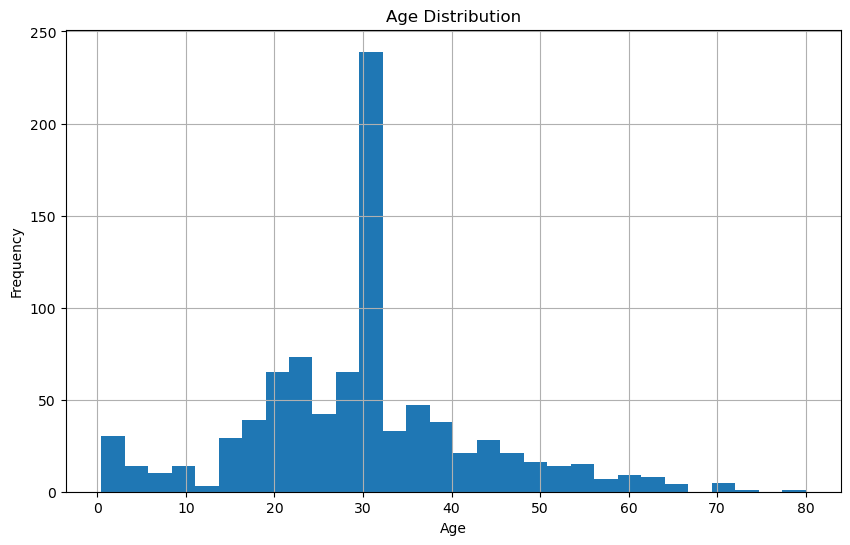

In [52]:
# Plotting the age distribution
titanic['age'].plot(kind='hist', bins=30, title='Age Distribution', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

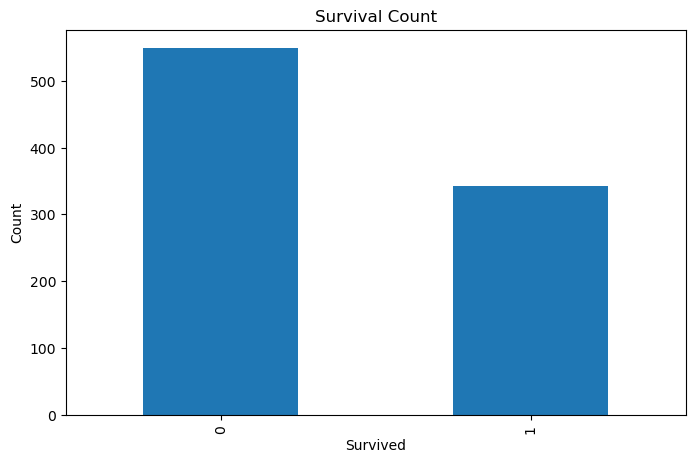

In [53]:
# Bar Chart: Count of survivors
titanic['survived'].value_counts().plot(kind='bar', title='Survival Count', figsize=(8, 5))
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


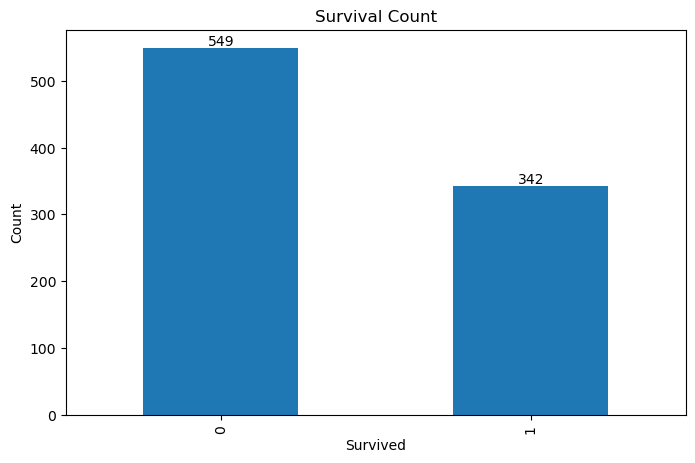

In [54]:
# Bar Chart: Count of survivors
ax = titanic['survived'].value_counts().plot(
    kind='bar', 
    title='Survival Count', 
    figsize=(8, 5)
)
# Add labels on top of bars
ax.bar_label(ax.containers[0])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [55]:

# Stacked bar chart: Survival count by gender
survival_gender = titanic.groupby(['sex', 'survived']).size().unstack()
survival_gender

survived,0,1
sex,,
female,81,233
male,468,109


[ 81. 468.]
[233. 109.]


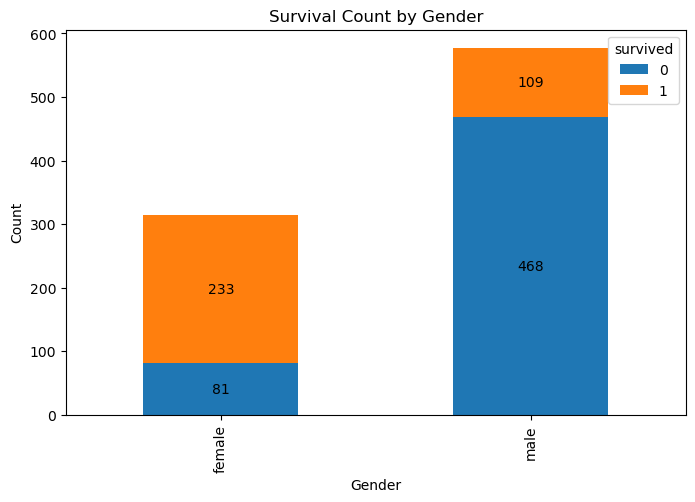

In [56]:
ax=survival_gender.plot(kind='bar', stacked=True, figsize=(8, 5))
for container in ax.containers:
    print(container.datavalues)
    ax.bar_label(container, label_type="center")
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

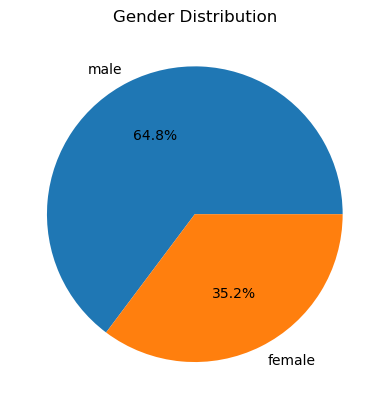

In [57]:

# Pie Chart: Proportion of male vs female
titanic['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.ylabel('')
plt.show()

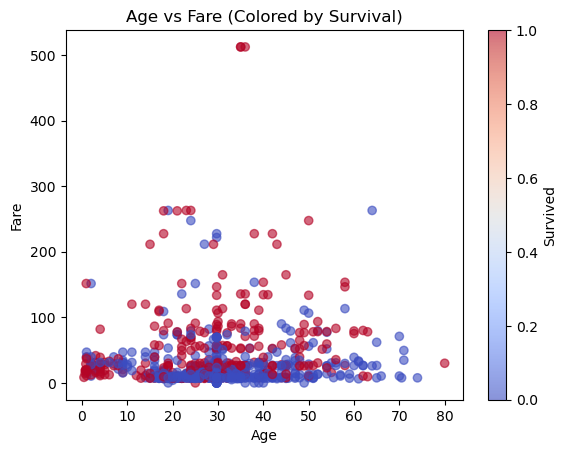

In [58]:
import numpy as np
plt.hist
# Scatter Plot: Age vs Fare colored by survival
plt.scatter(titanic['age'], titanic['fare'], c=titanic['survived'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Colored by Survival)')
plt.colorbar(label='Survived')
plt.show()

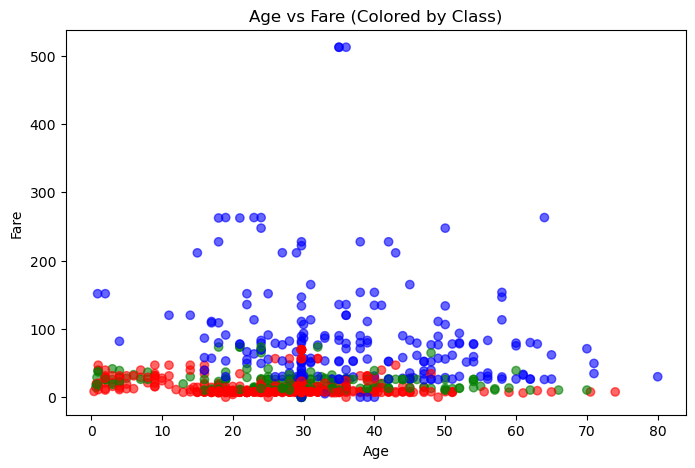

In [59]:
# Scatter plot: Age vs Fare colored by class
plt.figure(figsize=(8, 5))
classes = {'First': 'blue', 'Second': 'green', 'Third': 'red'}
colors = titanic['class'].map(classes)
plt.scatter(titanic['age'], titanic['fare'], c=colors, alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Colored by Class)')
plt.show()

In [60]:
# Display available colormap names in matplotlib
for i in plt.colormaps():
    print(i)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
berlin
managua
vanimo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
berlin_r
managua_r
vanimo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_

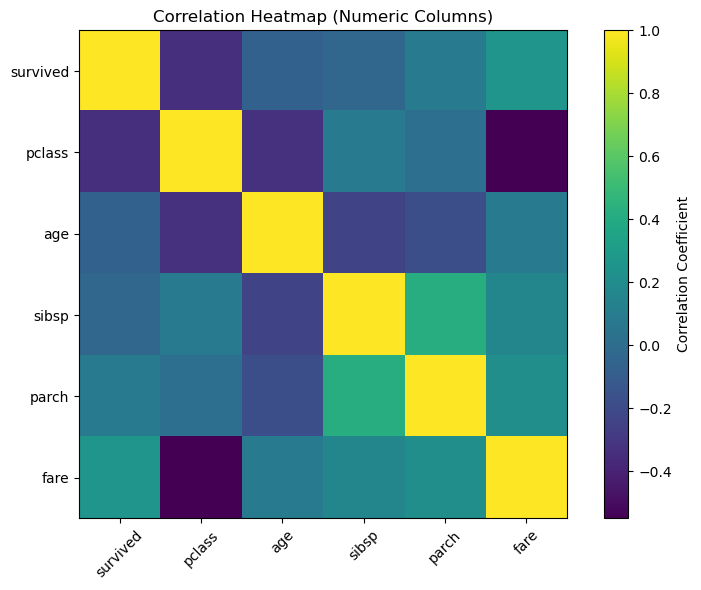

In [61]:

import numpy as np
# Generate heatmap for numeric columns of Titanic dataset using matplotlib
numeric_cols = titanic.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
# Heatmap
im = plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
# Colorbar
plt.colorbar(im, label='Correlation Coefficient')

# Tick labels
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

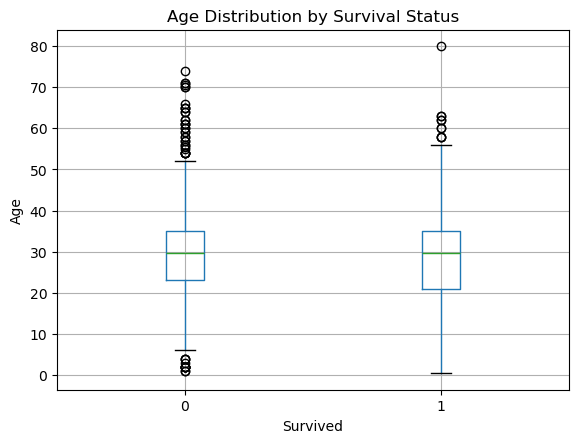

In [62]:
# Boxplot: Age distribution by survival status
plt.figure(figsize=(8, 5))
titanic.boxplot(column='age', by='survived')
plt.title('Age Distribution by Survival Status')
plt.suptitle('')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [63]:
# Linear Regression: Predicting Fare based on Age and Pclass
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare features and target
X = titanic[['age', 'pclass']].fillna(titanic['age'].mean())
y = titanic['fare']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and display score
score = lr.score(X_test, y_test)
print(f"Linear Regression R^2 score: {score:.3f}")

Linear Regression R^2 score: 0.320
